[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/10_Advanced_Optimization_Algorithms_Regression.ipynb)

# 10 Comparison of Different Advanced Optimization Algorithms Using Regression


In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving FFS_01433.csv to FFS_01433.csv
User uploaded file "FFS_01433.csv" with length 14378532 bytes


In [0]:
%matplotlib inline
%config InlineBacken.figure_format='retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, initializers
from keras import optimizers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [4]:
rawdf = pd.read_csv('FFS_01433.csv')
rawdf.head()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
0,33.39,36.24,27.68,25.24,19.23,18.15,22.40,41.06,40.67,41.43,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
1,27.72,31.35,30.80,25.55,20.82,22.28,20.66,31.29,34.35,33.95,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
2,27.72,31.35,30.80,25.55,20.82,22.28,20.66,31.29,34.35,33.95,...,30.11,29.02,26.32,18.23,18.10,21.34,40.32,41.33,35.51,107.5
3,32.33,28.40,24.78,27.88,20.32,17.44,21.35,41.28,40.31,38.46,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
4,32.33,28.40,24.78,27.88,20.32,17.44,21.35,41.28,40.31,38.46,...,30.45,29.61,37.12,18.79,23.47,19.89,44.17,32.37,46.24,107.5


In [5]:
pd.options.display.float_format='{:,.2f}'.format
rawdf.describe()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
count,"58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00",...,"58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00"
mean,30.03,29.06,29.97,28.55,20.21,19.55,19.93,39.96,41.69,40.70,...,30.55,28.31,29.86,21.24,20.15,19.95,39.42,38.59,40.49,116.55
std,2.82,3.23,2.67,2.52,1.55,1.49,1.93,4.03,4.14,3.94,...,3.45,1.97,3.42,2.97,1.95,1.62,3.30,3.81,3.91,4.09
min,23.22,22.73,24.78,23.81,17.18,15.69,15.49,31.29,32.37,32.32,...,22.73,25.76,23.81,17.18,15.69,15.49,31.29,32.37,32.32,107.50
25%,28.91,27.62,27.68,26.40,18.94,18.76,18.68,35.34,38.23,36.81,...,27.32,26.74,27.24,19.01,19.26,18.77,37.83,33.82,39.03,113.72
50%,30.54,29.70,30.21,28.28,20.32,19.36,20.76,41.06,40.67,40.54,...,30.16,28.45,30.25,20.17,20.52,19.97,39.81,39.42,40.99,116.53
75%,32.33,30.73,31.83,29.94,21.45,20.97,21.35,41.98,44.66,43.28,...,34.25,29.08,31.51,22.29,21.91,21.34,41.41,41.71,43.01,119.63
max,35.27,36.24,35.66,37.12,27.14,23.47,23.02,49.65,50.00,50.00,...,36.24,35.66,37.12,27.14,23.47,23.02,49.65,50.00,50.00,130.79


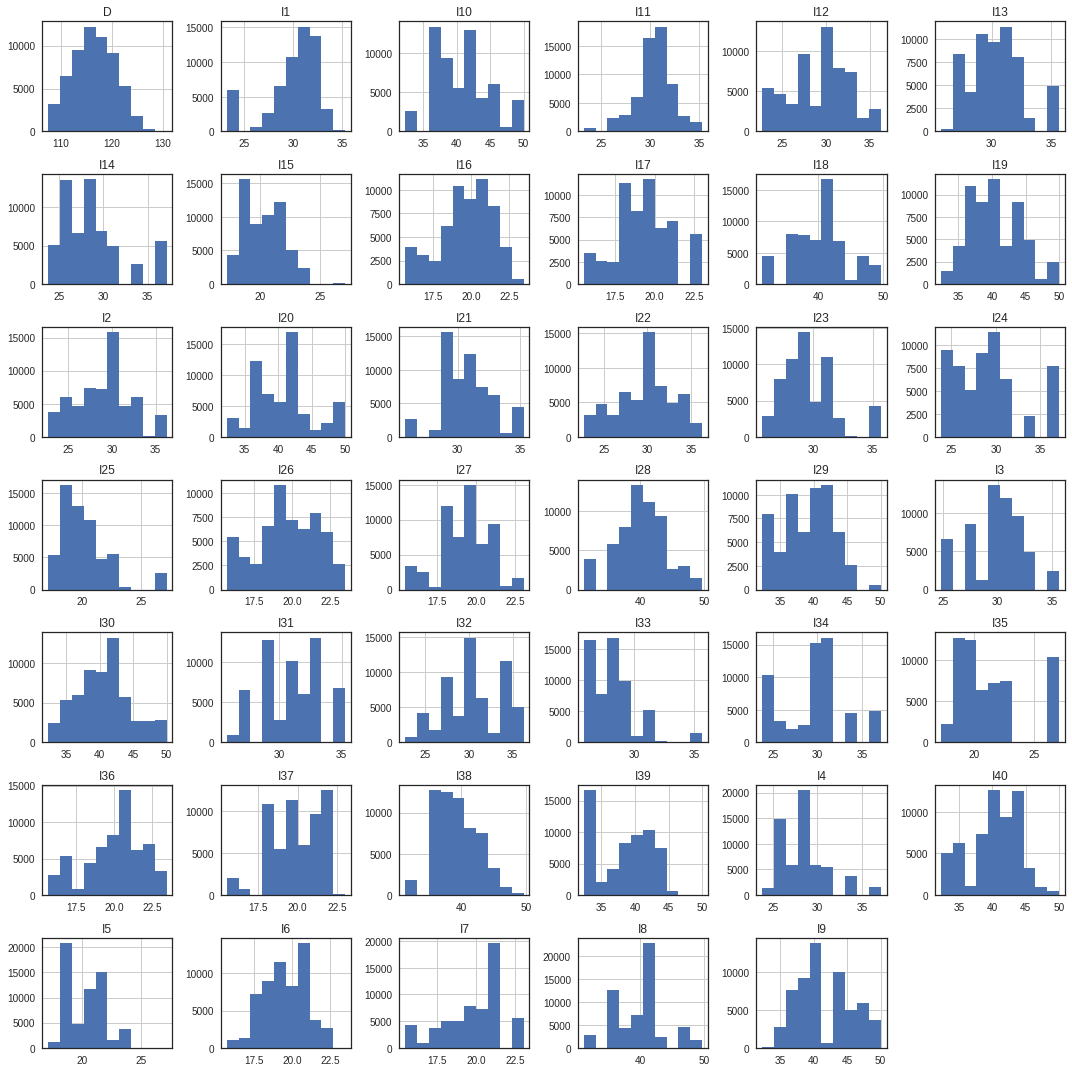

In [6]:
plt.style.use('seaborn-white')
rawdf.hist(figsize=(15,15))
plt.tight_layout()

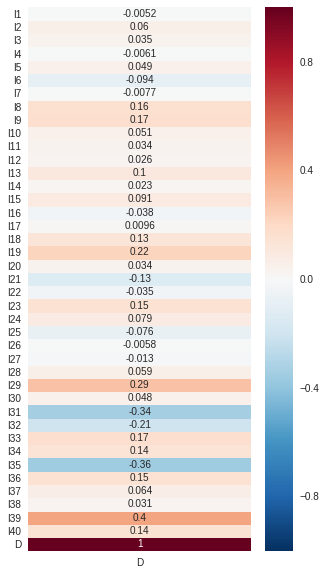

In [7]:
plt.figure(figsize=(5,10))
sns.heatmap(rawdf.corr()[['D']], annot=True, vmin=-1,vmax=1,)

In [0]:
df = rawdf.copy()

#feature scale
ss = StandardScaler()
scale_features = ['I1','I2','I3','I4','I5','I6','I7','I8','I9','I10',
                 'I11','I12','I13','I14','I15','I16','I17','I18','I19','I20',
                 'I21','I22','I23','I24','I25','I26','I27','I28','I29','I30',
                 'I31','I32','I33','I34','I35','I36','I37','I38','I39','I40','D']
df[scale_features] = ss.fit_transform(df[scale_features])

In [9]:
df.head()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
0,1.19,2.22,-0.86,-1.31,-0.63,-0.94,1.28,0.27,-0.25,0.19,...,-1.37,-0.68,-0.77,-0.60,-1.00,0.71,-2.20,-0.29,-0.13,-2.21
1,-0.82,0.71,0.31,-1.19,0.39,1.83,0.38,-2.15,-1.77,-1.71,...,-1.37,-0.68,-0.77,-0.60,-1.00,0.71,-2.20,-0.29,-0.13,-2.21
2,-0.82,0.71,0.31,-1.19,0.39,1.83,0.38,-2.15,-1.77,-1.71,...,-0.13,0.36,-1.04,-1.01,-1.05,0.86,0.27,0.72,-1.28,-2.21
3,0.82,-0.21,-1.95,-0.26,0.07,-1.42,0.74,0.33,-0.33,-0.57,...,-1.37,-0.68,-0.77,-0.60,-1.00,0.71,-2.20,-0.29,-0.13,-2.21
4,0.82,-0.21,-1.95,-0.26,0.07,-1.42,0.74,0.33,-0.33,-0.57,...,-0.03,0.66,2.12,-0.82,1.70,-0.04,1.44,-1.63,1.47,-2.21


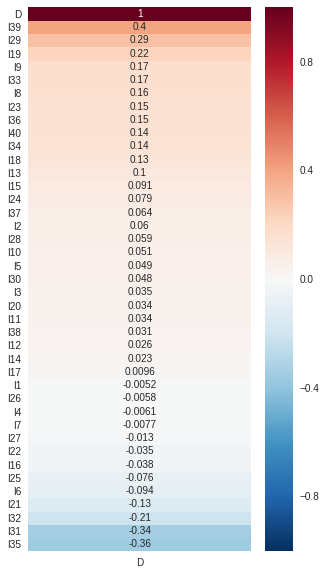

In [10]:
plt.figure(figsize=(5,10))
tempdf = df.corr()[['D']].sort_values('D',ascending=False)
sns.heatmap(tempdf, annot=True, vmin=-1,vmax=1,)

In [11]:
X = df.drop(['D'],axis=1).values
y = (df['D'].values).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(47124, 40) (47124, 1) (11781, 40) (11781, 1)


##  Building the Neural Network

In [0]:
epochs = 100
batch_size = 256

In [0]:
def model(optimizer):
  model = Sequential()
  model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1))
  
  model.compile(loss='mse',
               optimizer=optimizer,metrics=['accuracy'])
  
  return model

### 3.1 Optimizer = vanilla SGD with learning rate = 0.01




In [0]:
vanilla_sgd = optimizers.SGD(lr=0.01, decay=0, momentum=0, nesterov=False)

In [22]:
start = time.time()
model_1 = model(vanilla_sgd)
model_1_history = model_1.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_split=0.2)
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 37699 samples, validate on 9425 samples
Epoch 1/100
 - 2s - loss: 0.8793 - acc: 0.0000e+00 - val_loss: 0.7215 - val_acc: 0.0000e+00
Epoch 2/100
 - 1s - loss: 0.6143 - acc: 0.0000e+00 - val_loss: 0.5637 - val_acc: 0.0000e+00
Epoch 3/100
 - 1s - loss: 0.5309 - acc: 0.0000e+00 - val_loss: 0.5176 - val_acc: 0.0000e+00
Epoch 4/100
 - 1s - loss: 0.4964 - acc: 0.0000e+00 - val_loss: 0.4922 - val_acc: 0.0000e+00
Epoch 5/100
 - 1s - loss: 0.4744 - acc: 0.0000e+00 - val_loss: 0.4749 - val_acc: 0.0000e+00
Epoch 6/100
 - 1s - loss: 0.4584 - acc: 0.0000e+00 - val_loss: 0.4627 - val_acc: 0.0000e+00
Epoch 7/100
 - 1s - loss: 0.4454 - acc: 0.0000e+00 - val_loss: 0.4501 - val_acc: 0.0000e+00
Epoch 8/100
 - 1s - loss: 0.4346 - acc: 0.0000e+00 - val_loss: 0.4414 - val_acc: 0.0000e+00
Epoch 9/100
 - 1s - loss: 0.4256 - acc: 0.0000e+00 - val_loss: 0.4337 - val_acc: 0.0000e+00
Epoch 10/100
 - 1s - loss: 0.4178 - acc: 0.0000e+00 - val_loss: 0.4266 - val_acc: 0.0000e+00
Epoch 11/100
 - 1s - loss: 0.4

Epoch 33/100
 - 1s - loss: 0.3372 - acc: 0.0000e+00 - val_loss: 0.3589 - val_acc: 0.0000e+00
Epoch 34/100
 - 1s - loss: 0.3354 - acc: 0.0000e+00 - val_loss: 0.3583 - val_acc: 0.0000e+00
Epoch 35/100
 - 1s - loss: 0.3336 - acc: 0.0000e+00 - val_loss: 0.3561 - val_acc: 0.0000e+00
Epoch 36/100
 - 1s - loss: 0.3320 - acc: 0.0000e+00 - val_loss: 0.3560 - val_acc: 0.0000e+00
Epoch 37/100
 - 1s - loss: 0.3304 - acc: 0.0000e+00 - val_loss: 0.3533 - val_acc: 0.0000e+00
Epoch 38/100
 - 1s - loss: 0.3285 - acc: 0.0000e+00 - val_loss: 0.3526 - val_acc: 0.0000e+00
Epoch 39/100
 - 1s - loss: 0.3272 - acc: 0.0000e+00 - val_loss: 0.3528 - val_acc: 0.0000e+00
Epoch 40/100
 - 1s - loss: 0.3256 - acc: 0.0000e+00 - val_loss: 0.3503 - val_acc: 0.0000e+00
Epoch 41/100
 - 1s - loss: 0.3240 - acc: 0.0000e+00 - val_loss: 0.3487 - val_acc: 0.0000e+00
Epoch 42/100
 - 1s - loss: 0.3225 - acc: 0.0000e+00 - val_loss: 0.3479 - val_acc: 0.0000e+00
Epoch 43/100
 - 1s - loss: 0.3211 - acc: 0.0000e+00 - val_loss: 0.3476

 - 1s - loss: 0.2961 - acc: 0.0000e+00 - val_loss: 0.3275 - val_acc: 0.0000e+00
Epoch 66/100
 - 1s - loss: 0.2952 - acc: 0.0000e+00 - val_loss: 0.3269 - val_acc: 0.0000e+00
Epoch 67/100
 - 1s - loss: 0.2943 - acc: 0.0000e+00 - val_loss: 0.3264 - val_acc: 0.0000e+00
Epoch 68/100
 - 1s - loss: 0.2934 - acc: 0.0000e+00 - val_loss: 0.3265 - val_acc: 0.0000e+00
Epoch 69/100
 - 1s - loss: 0.2924 - acc: 0.0000e+00 - val_loss: 0.3248 - val_acc: 0.0000e+00
Epoch 70/100
 - 1s - loss: 0.2917 - acc: 0.0000e+00 - val_loss: 0.3275 - val_acc: 0.0000e+00
Epoch 71/100
 - 1s - loss: 0.2909 - acc: 0.0000e+00 - val_loss: 0.3231 - val_acc: 0.0000e+00
Epoch 72/100
 - 1s - loss: 0.2899 - acc: 0.0000e+00 - val_loss: 0.3232 - val_acc: 0.0000e+00
Epoch 73/100
 - 1s - loss: 0.2891 - acc: 0.0000e+00 - val_loss: 0.3220 - val_acc: 0.0000e+00
Epoch 74/100
 - 1s - loss: 0.2881 - acc: 0.0000e+00 - val_loss: 0.3252 - val_acc: 0.0000e+00
Epoch 75/100
 - 1s - loss: 0.2876 - acc: 0.0000e+00 - val_loss: 0.3248 - val_acc: 0

 - 1s - loss: 0.2717 - acc: 0.0000e+00 - val_loss: 0.3210 - val_acc: 0.0000e+00
Epoch 98/100
 - 1s - loss: 0.2713 - acc: 0.0000e+00 - val_loss: 0.3129 - val_acc: 0.0000e+00
Epoch 99/100
 - 1s - loss: 0.2705 - acc: 0.0000e+00 - val_loss: 0.3129 - val_acc: 0.0000e+00
Epoch 100/100
 - 1s - loss: 0.2699 - acc: 0.0000e+00 - val_loss: 0.3111 - val_acc: 0.0000e+00
@ Total Time Spent: 80.28 seconds


### 3.2 Optimizer = SGD with Momentum learning rate = 0.01, beta=0.9

In [0]:
sgd_momentum = optimizers.SGD(lr=0.01, decay=0, momentum=0.9, nesterov=False)

In [24]:
start = time.time()
model_2 = model(sgd_momentum)
model_2_history = model_2.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_split=0.2)
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 37699 samples, validate on 9425 samples
Epoch 1/100
 - 1s - loss: 0.5332 - acc: 0.0000e+00 - val_loss: 0.4206 - val_acc: 0.0000e+00
Epoch 2/100
 - 1s - loss: 0.3873 - acc: 0.0000e+00 - val_loss: 0.3828 - val_acc: 0.0000e+00
Epoch 3/100
 - 1s - loss: 0.3589 - acc: 0.0000e+00 - val_loss: 0.3585 - val_acc: 0.0000e+00
Epoch 4/100
 - 1s - loss: 0.3395 - acc: 0.0000e+00 - val_loss: 0.3512 - val_acc: 0.0000e+00
Epoch 5/100
 - 1s - loss: 0.3264 - acc: 0.0000e+00 - val_loss: 0.3448 - val_acc: 0.0000e+00
Epoch 6/100
 - 1s - loss: 0.3142 - acc: 0.0000e+00 - val_loss: 0.3301 - val_acc: 0.0000e+00
Epoch 7/100
 - 1s - loss: 0.3052 - acc: 0.0000e+00 - val_loss: 0.3346 - val_acc: 0.0000e+00
Epoch 8/100
 - 1s - loss: 0.2967 - acc: 0.0000e+00 - val_loss: 0.3225 - val_acc: 0.0000e+00
Epoch 9/100
 - 1s - loss: 0.2923 - acc: 0.0000e+00 - val_loss: 0.3110 - val_acc: 0.0000e+00
Epoch 10/100
 - 1s - loss: 0.2846 - acc: 0.0000e+00 - val_loss: 0.3106 - val_acc: 0.0000e+00
Epoch 11/100
 - 1s - loss: 0.2

Epoch 33/100
 - 1s - loss: 0.2218 - acc: 0.0000e+00 - val_loss: 0.2756 - val_acc: 0.0000e+00
Epoch 34/100
 - 1s - loss: 0.2207 - acc: 0.0000e+00 - val_loss: 0.2795 - val_acc: 0.0000e+00
Epoch 35/100
 - 1s - loss: 0.2203 - acc: 0.0000e+00 - val_loss: 0.2793 - val_acc: 0.0000e+00
Epoch 36/100
 - 1s - loss: 0.2174 - acc: 0.0000e+00 - val_loss: 0.2788 - val_acc: 0.0000e+00
Epoch 37/100
 - 1s - loss: 0.2160 - acc: 0.0000e+00 - val_loss: 0.2755 - val_acc: 0.0000e+00
Epoch 38/100
 - 1s - loss: 0.2150 - acc: 0.0000e+00 - val_loss: 0.2752 - val_acc: 0.0000e+00
Epoch 39/100
 - 1s - loss: 0.2152 - acc: 0.0000e+00 - val_loss: 0.2820 - val_acc: 0.0000e+00
Epoch 40/100
 - 1s - loss: 0.2138 - acc: 0.0000e+00 - val_loss: 0.2738 - val_acc: 0.0000e+00
Epoch 41/100
 - 1s - loss: 0.2117 - acc: 0.0000e+00 - val_loss: 0.2826 - val_acc: 0.0000e+00
Epoch 42/100
 - 1s - loss: 0.2118 - acc: 0.0000e+00 - val_loss: 0.2747 - val_acc: 0.0000e+00
Epoch 43/100
 - 1s - loss: 0.2102 - acc: 0.0000e+00 - val_loss: 0.2696

 - 1s - loss: 0.1941 - acc: 0.0000e+00 - val_loss: 0.2729 - val_acc: 0.0000e+00
Epoch 66/100
 - 1s - loss: 0.1935 - acc: 0.0000e+00 - val_loss: 0.2768 - val_acc: 0.0000e+00
Epoch 67/100
 - 1s - loss: 0.1930 - acc: 0.0000e+00 - val_loss: 0.2702 - val_acc: 0.0000e+00
Epoch 68/100
 - 1s - loss: 0.1933 - acc: 0.0000e+00 - val_loss: 0.2731 - val_acc: 0.0000e+00
Epoch 69/100
 - 1s - loss: 0.1920 - acc: 0.0000e+00 - val_loss: 0.2726 - val_acc: 0.0000e+00
Epoch 70/100
 - 1s - loss: 0.1927 - acc: 0.0000e+00 - val_loss: 0.2701 - val_acc: 0.0000e+00
Epoch 71/100
 - 1s - loss: 0.1910 - acc: 0.0000e+00 - val_loss: 0.2708 - val_acc: 0.0000e+00
Epoch 72/100
 - 1s - loss: 0.1899 - acc: 0.0000e+00 - val_loss: 0.2752 - val_acc: 0.0000e+00
Epoch 73/100
 - 1s - loss: 0.1894 - acc: 0.0000e+00 - val_loss: 0.2716 - val_acc: 0.0000e+00
Epoch 74/100
 - 1s - loss: 0.1886 - acc: 0.0000e+00 - val_loss: 0.2711 - val_acc: 0.0000e+00
Epoch 75/100
 - 1s - loss: 0.1878 - acc: 0.0000e+00 - val_loss: 0.2689 - val_acc: 0

 - 1s - loss: 0.1793 - acc: 0.0000e+00 - val_loss: 0.2716 - val_acc: 0.0000e+00
Epoch 98/100
 - 1s - loss: 0.1804 - acc: 0.0000e+00 - val_loss: 0.2724 - val_acc: 0.0000e+00
Epoch 99/100
 - 1s - loss: 0.1808 - acc: 0.0000e+00 - val_loss: 0.2786 - val_acc: 0.0000e+00
Epoch 100/100
 - 1s - loss: 0.1816 - acc: 0.0000e+00 - val_loss: 0.2739 - val_acc: 0.0000e+00
@ Total Time Spent: 80.71 seconds


### 3.3 Optimizer = SGD with Momentum learning rate = 0.01, beta=0.9, NAG=true

In [0]:
NAG_momentum = optimizers.SGD(lr=0.01, decay=0, momentum=0.9, nesterov=True)

In [26]:
start = time.time()
model_3 = model(NAG_momentum)
model_3_history = model_3.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_split=0.2)
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 37699 samples, validate on 9425 samples
Epoch 1/100
 - 1s - loss: 0.5838 - acc: 0.0000e+00 - val_loss: 0.4337 - val_acc: 0.0000e+00
Epoch 2/100
 - 1s - loss: 0.3997 - acc: 0.0000e+00 - val_loss: 0.3988 - val_acc: 0.0000e+00
Epoch 3/100
 - 1s - loss: 0.3675 - acc: 0.0000e+00 - val_loss: 0.3704 - val_acc: 0.0000e+00
Epoch 4/100
 - 1s - loss: 0.3497 - acc: 0.0000e+00 - val_loss: 0.3547 - val_acc: 0.0000e+00
Epoch 5/100
 - 1s - loss: 0.3360 - acc: 0.0000e+00 - val_loss: 0.3437 - val_acc: 0.0000e+00
Epoch 6/100
 - 1s - loss: 0.3248 - acc: 0.0000e+00 - val_loss: 0.3360 - val_acc: 0.0000e+00
Epoch 7/100
 - 1s - loss: 0.3163 - acc: 0.0000e+00 - val_loss: 0.3250 - val_acc: 0.0000e+00
Epoch 8/100
 - 1s - loss: 0.3080 - acc: 0.0000e+00 - val_loss: 0.3205 - val_acc: 0.0000e+00
Epoch 9/100
 - 1s - loss: 0.3006 - acc: 0.0000e+00 - val_loss: 0.3151 - val_acc: 0.0000e+00
Epoch 10/100
 - 1s - loss: 0.2929 - acc: 0.0000e+00 - val_loss: 0.3183 - val_acc: 0.0000e+00
Epoch 11/100
 - 1s - loss: 0.2

Epoch 33/100
 - 1s - loss: 0.2239 - acc: 0.0000e+00 - val_loss: 0.2755 - val_acc: 0.0000e+00
Epoch 34/100
 - 1s - loss: 0.2226 - acc: 0.0000e+00 - val_loss: 0.2741 - val_acc: 0.0000e+00
Epoch 35/100
 - 1s - loss: 0.2213 - acc: 0.0000e+00 - val_loss: 0.2730 - val_acc: 0.0000e+00
Epoch 36/100
 - 1s - loss: 0.2199 - acc: 0.0000e+00 - val_loss: 0.2705 - val_acc: 0.0000e+00
Epoch 37/100
 - 1s - loss: 0.2191 - acc: 0.0000e+00 - val_loss: 0.2703 - val_acc: 0.0000e+00
Epoch 38/100
 - 1s - loss: 0.2176 - acc: 0.0000e+00 - val_loss: 0.2730 - val_acc: 0.0000e+00
Epoch 39/100
 - 1s - loss: 0.2165 - acc: 0.0000e+00 - val_loss: 0.2954 - val_acc: 0.0000e+00
Epoch 40/100
 - 1s - loss: 0.2156 - acc: 0.0000e+00 - val_loss: 0.2742 - val_acc: 0.0000e+00
Epoch 41/100
 - 1s - loss: 0.2144 - acc: 0.0000e+00 - val_loss: 0.2825 - val_acc: 0.0000e+00
Epoch 42/100
 - 1s - loss: 0.2143 - acc: 0.0000e+00 - val_loss: 0.2709 - val_acc: 0.0000e+00
Epoch 43/100
 - 1s - loss: 0.2118 - acc: 0.0000e+00 - val_loss: 0.2715

 - 1s - loss: 0.1960 - acc: 0.0000e+00 - val_loss: 0.2744 - val_acc: 0.0000e+00
Epoch 66/100
 - 1s - loss: 0.1953 - acc: 0.0000e+00 - val_loss: 0.2689 - val_acc: 0.0000e+00
Epoch 67/100
 - 1s - loss: 0.1948 - acc: 0.0000e+00 - val_loss: 0.2689 - val_acc: 0.0000e+00
Epoch 68/100
 - 1s - loss: 0.1946 - acc: 0.0000e+00 - val_loss: 0.2695 - val_acc: 0.0000e+00
Epoch 69/100
 - 1s - loss: 0.1936 - acc: 0.0000e+00 - val_loss: 0.2666 - val_acc: 0.0000e+00
Epoch 70/100
 - 1s - loss: 0.1937 - acc: 0.0000e+00 - val_loss: 0.2714 - val_acc: 0.0000e+00
Epoch 71/100
 - 1s - loss: 0.1930 - acc: 0.0000e+00 - val_loss: 0.2696 - val_acc: 0.0000e+00
Epoch 72/100
 - 1s - loss: 0.1921 - acc: 0.0000e+00 - val_loss: 0.2678 - val_acc: 0.0000e+00
Epoch 73/100
 - 1s - loss: 0.1915 - acc: 0.0000e+00 - val_loss: 0.2651 - val_acc: 0.0000e+00
Epoch 74/100
 - 1s - loss: 0.1914 - acc: 0.0000e+00 - val_loss: 0.2731 - val_acc: 0.0000e+00
Epoch 75/100
 - 1s - loss: 0.1914 - acc: 0.0000e+00 - val_loss: 0.2680 - val_acc: 0

 - 1s - loss: 0.1827 - acc: 0.0000e+00 - val_loss: 0.2975 - val_acc: 0.0000e+00
Epoch 98/100
 - 1s - loss: 0.1825 - acc: 0.0000e+00 - val_loss: 0.2666 - val_acc: 0.0000e+00
Epoch 99/100
 - 1s - loss: 0.1823 - acc: 0.0000e+00 - val_loss: 0.2715 - val_acc: 0.0000e+00
Epoch 100/100
 - 1s - loss: 0.1825 - acc: 0.0000e+00 - val_loss: 0.2698 - val_acc: 0.0000e+00
@ Total Time Spent: 84.87 seconds


### 3.4 Optimizer = AdaGrad learning rate = 0.01



In [0]:
Adagrad = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0)

In [28]:
start = time.time()
model_4 = model(Adagrad)
model_4_history = model_4.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_split=0.2)
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 37699 samples, validate on 9425 samples
Epoch 1/100
 - 1s - loss: 0.4757 - acc: 0.0000e+00 - val_loss: 0.4139 - val_acc: 0.0000e+00
Epoch 2/100
 - 1s - loss: 0.3860 - acc: 0.0000e+00 - val_loss: 0.3829 - val_acc: 0.0000e+00
Epoch 3/100
 - 1s - loss: 0.3624 - acc: 0.0000e+00 - val_loss: 0.3699 - val_acc: 0.0000e+00
Epoch 4/100
 - 1s - loss: 0.3476 - acc: 0.0000e+00 - val_loss: 0.3580 - val_acc: 0.0000e+00
Epoch 5/100
 - 1s - loss: 0.3368 - acc: 0.0000e+00 - val_loss: 0.3513 - val_acc: 0.0000e+00
Epoch 6/100
 - 1s - loss: 0.3285 - acc: 0.0000e+00 - val_loss: 0.3450 - val_acc: 0.0000e+00
Epoch 7/100
 - 1s - loss: 0.3214 - acc: 0.0000e+00 - val_loss: 0.3452 - val_acc: 0.0000e+00
Epoch 8/100
 - 1s - loss: 0.3159 - acc: 0.0000e+00 - val_loss: 0.3381 - val_acc: 0.0000e+00
Epoch 9/100
 - 1s - loss: 0.3109 - acc: 0.0000e+00 - val_loss: 0.3339 - val_acc: 0.0000e+00
Epoch 10/100
 - 1s - loss: 0.3068 - acc: 0.0000e+00 - val_loss: 0.3319 - val_acc: 0.0000e+00
Epoch 11/100
 - 1s - loss: 0.3

Epoch 33/100
 - 1s - loss: 0.2646 - acc: 0.0000e+00 - val_loss: 0.3063 - val_acc: 0.0000e+00
Epoch 34/100
 - 1s - loss: 0.2637 - acc: 0.0000e+00 - val_loss: 0.3053 - val_acc: 0.0000e+00
Epoch 35/100
 - 1s - loss: 0.2626 - acc: 0.0000e+00 - val_loss: 0.3066 - val_acc: 0.0000e+00
Epoch 36/100
 - 1s - loss: 0.2618 - acc: 0.0000e+00 - val_loss: 0.3045 - val_acc: 0.0000e+00
Epoch 37/100
 - 1s - loss: 0.2610 - acc: 0.0000e+00 - val_loss: 0.3044 - val_acc: 0.0000e+00
Epoch 38/100
 - 1s - loss: 0.2603 - acc: 0.0000e+00 - val_loss: 0.3040 - val_acc: 0.0000e+00
Epoch 39/100
 - 1s - loss: 0.2593 - acc: 0.0000e+00 - val_loss: 0.3053 - val_acc: 0.0000e+00
Epoch 40/100
 - 1s - loss: 0.2584 - acc: 0.0000e+00 - val_loss: 0.3038 - val_acc: 0.0000e+00
Epoch 41/100
 - 1s - loss: 0.2578 - acc: 0.0000e+00 - val_loss: 0.3029 - val_acc: 0.0000e+00
Epoch 42/100
 - 1s - loss: 0.2571 - acc: 0.0000e+00 - val_loss: 0.3026 - val_acc: 0.0000e+00
Epoch 43/100
 - 1s - loss: 0.2562 - acc: 0.0000e+00 - val_loss: 0.3017

 - 1s - loss: 0.2442 - acc: 0.0000e+00 - val_loss: 0.2993 - val_acc: 0.0000e+00
Epoch 66/100
 - 1s - loss: 0.2438 - acc: 0.0000e+00 - val_loss: 0.2959 - val_acc: 0.0000e+00
Epoch 67/100
 - 1s - loss: 0.2433 - acc: 0.0000e+00 - val_loss: 0.2960 - val_acc: 0.0000e+00
Epoch 68/100
 - 1s - loss: 0.2428 - acc: 0.0000e+00 - val_loss: 0.2959 - val_acc: 0.0000e+00
Epoch 69/100
 - 1s - loss: 0.2424 - acc: 0.0000e+00 - val_loss: 0.2954 - val_acc: 0.0000e+00
Epoch 70/100
 - 1s - loss: 0.2419 - acc: 0.0000e+00 - val_loss: 0.2951 - val_acc: 0.0000e+00
Epoch 71/100
 - 1s - loss: 0.2415 - acc: 0.0000e+00 - val_loss: 0.2991 - val_acc: 0.0000e+00
Epoch 72/100
 - 1s - loss: 0.2411 - acc: 0.0000e+00 - val_loss: 0.2949 - val_acc: 0.0000e+00
Epoch 73/100
 - 1s - loss: 0.2408 - acc: 0.0000e+00 - val_loss: 0.2953 - val_acc: 0.0000e+00
Epoch 74/100
 - 1s - loss: 0.2403 - acc: 0.0000e+00 - val_loss: 0.2947 - val_acc: 0.0000e+00
Epoch 75/100
 - 1s - loss: 0.2399 - acc: 0.0000e+00 - val_loss: 0.2945 - val_acc: 0

 - 1s - loss: 0.2327 - acc: 0.0000e+00 - val_loss: 0.2914 - val_acc: 0.0000e+00
Epoch 98/100
 - 1s - loss: 0.2324 - acc: 0.0000e+00 - val_loss: 0.2911 - val_acc: 0.0000e+00
Epoch 99/100
 - 1s - loss: 0.2320 - acc: 0.0000e+00 - val_loss: 0.2906 - val_acc: 0.0000e+00
Epoch 100/100
 - 1s - loss: 0.2318 - acc: 0.0000e+00 - val_loss: 0.2908 - val_acc: 0.0000e+00
@ Total Time Spent: 92.07 seconds


### 3.5 Optimizer = RMSprop lr=0.001, rho=0.9

In [0]:
RMSprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

In [30]:
start = time.time()
model_5 = model(RMSprop)
model_5_history = model_5.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_split=0.2)
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 37699 samples, validate on 9425 samples
Epoch 1/100
 - 1s - loss: 0.6342 - acc: 0.0000e+00 - val_loss: 0.4446 - val_acc: 0.0000e+00
Epoch 2/100
 - 1s - loss: 0.4075 - acc: 0.0000e+00 - val_loss: 0.3898 - val_acc: 0.0000e+00
Epoch 3/100
 - 1s - loss: 0.3670 - acc: 0.0000e+00 - val_loss: 0.3658 - val_acc: 0.0000e+00
Epoch 4/100
 - 1s - loss: 0.3436 - acc: 0.0000e+00 - val_loss: 0.3488 - val_acc: 0.0000e+00
Epoch 5/100
 - 1s - loss: 0.3265 - acc: 0.0000e+00 - val_loss: 0.3505 - val_acc: 0.0000e+00
Epoch 6/100
 - 1s - loss: 0.3134 - acc: 0.0000e+00 - val_loss: 0.3289 - val_acc: 0.0000e+00
Epoch 7/100
 - 1s - loss: 0.3028 - acc: 0.0000e+00 - val_loss: 0.3258 - val_acc: 0.0000e+00
Epoch 8/100
 - 1s - loss: 0.2950 - acc: 0.0000e+00 - val_loss: 0.3328 - val_acc: 0.0000e+00
Epoch 9/100
 - 1s - loss: 0.2878 - acc: 0.0000e+00 - val_loss: 0.3141 - val_acc: 0.0000e+00
Epoch 10/100
 - 1s - loss: 0.2813 - acc: 0.0000e+00 - val_loss: 0.3147 - val_acc: 0.0000e+00
Epoch 11/100
 - 1s - loss: 0.2

Epoch 33/100
 - 1s - loss: 0.2182 - acc: 0.0000e+00 - val_loss: 0.2784 - val_acc: 0.0000e+00
Epoch 34/100
 - 1s - loss: 0.2176 - acc: 0.0000e+00 - val_loss: 0.2770 - val_acc: 0.0000e+00
Epoch 35/100
 - 1s - loss: 0.2156 - acc: 0.0000e+00 - val_loss: 0.2808 - val_acc: 0.0000e+00
Epoch 36/100
 - 1s - loss: 0.2144 - acc: 0.0000e+00 - val_loss: 0.2783 - val_acc: 0.0000e+00
Epoch 37/100
 - 1s - loss: 0.2130 - acc: 0.0000e+00 - val_loss: 0.2783 - val_acc: 0.0000e+00
Epoch 38/100
 - 1s - loss: 0.2131 - acc: 0.0000e+00 - val_loss: 0.2766 - val_acc: 0.0000e+00
Epoch 39/100
 - 1s - loss: 0.2112 - acc: 0.0000e+00 - val_loss: 0.2734 - val_acc: 0.0000e+00
Epoch 40/100
 - 1s - loss: 0.2110 - acc: 0.0000e+00 - val_loss: 0.2905 - val_acc: 0.0000e+00
Epoch 41/100
 - 1s - loss: 0.2093 - acc: 0.0000e+00 - val_loss: 0.2880 - val_acc: 0.0000e+00
Epoch 42/100
 - 1s - loss: 0.2086 - acc: 0.0000e+00 - val_loss: 0.2766 - val_acc: 0.0000e+00
Epoch 43/100
 - 1s - loss: 0.2070 - acc: 0.0000e+00 - val_loss: 0.2733

 - 1s - loss: 0.1929 - acc: 0.0000e+00 - val_loss: 0.2719 - val_acc: 0.0000e+00
Epoch 66/100
 - 1s - loss: 0.1927 - acc: 0.0000e+00 - val_loss: 0.2796 - val_acc: 0.0000e+00
Epoch 67/100
 - 1s - loss: 0.1917 - acc: 0.0000e+00 - val_loss: 0.2746 - val_acc: 0.0000e+00
Epoch 68/100
 - 1s - loss: 0.1910 - acc: 0.0000e+00 - val_loss: 0.2963 - val_acc: 0.0000e+00
Epoch 69/100
 - 1s - loss: 0.1910 - acc: 0.0000e+00 - val_loss: 0.2852 - val_acc: 0.0000e+00
Epoch 70/100
 - 1s - loss: 0.1906 - acc: 0.0000e+00 - val_loss: 0.3013 - val_acc: 0.0000e+00
Epoch 71/100
 - 1s - loss: 0.1892 - acc: 0.0000e+00 - val_loss: 0.2891 - val_acc: 0.0000e+00
Epoch 72/100
 - 1s - loss: 0.1894 - acc: 0.0000e+00 - val_loss: 0.2799 - val_acc: 0.0000e+00
Epoch 73/100
 - 1s - loss: 0.1889 - acc: 0.0000e+00 - val_loss: 0.2721 - val_acc: 0.0000e+00
Epoch 74/100
 - 1s - loss: 0.1884 - acc: 0.0000e+00 - val_loss: 0.2747 - val_acc: 0.0000e+00
Epoch 75/100
 - 1s - loss: 0.1881 - acc: 0.0000e+00 - val_loss: 0.2751 - val_acc: 0

 - 1s - loss: 0.1809 - acc: 0.0000e+00 - val_loss: 0.2785 - val_acc: 0.0000e+00
Epoch 98/100
 - 1s - loss: 0.1809 - acc: 0.0000e+00 - val_loss: 0.2765 - val_acc: 0.0000e+00
Epoch 99/100
 - 1s - loss: 0.1803 - acc: 0.0000e+00 - val_loss: 0.2841 - val_acc: 0.0000e+00
Epoch 100/100
 - 1s - loss: 0.1808 - acc: 0.0000e+00 - val_loss: 0.2755 - val_acc: 0.0000e+00
@ Total Time Spent: 97.03 seconds


### 3.6 Optimizer = Adam lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False

In [0]:
Adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [32]:
start = time.time()
model_6 = model(Adam)
model_6_history = model_6.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_split=0.2)
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 37699 samples, validate on 9425 samples
Epoch 1/100
 - 2s - loss: 0.5640 - acc: 0.0000e+00 - val_loss: 0.4333 - val_acc: 0.0000e+00
Epoch 2/100
 - 1s - loss: 0.3936 - acc: 0.0000e+00 - val_loss: 0.3841 - val_acc: 0.0000e+00
Epoch 3/100
 - 1s - loss: 0.3581 - acc: 0.0000e+00 - val_loss: 0.3604 - val_acc: 0.0000e+00
Epoch 4/100
 - 1s - loss: 0.3356 - acc: 0.0000e+00 - val_loss: 0.3437 - val_acc: 0.0000e+00
Epoch 5/100
 - 1s - loss: 0.3186 - acc: 0.0000e+00 - val_loss: 0.3347 - val_acc: 0.0000e+00
Epoch 6/100
 - 1s - loss: 0.3059 - acc: 0.0000e+00 - val_loss: 0.3295 - val_acc: 0.0000e+00
Epoch 7/100
 - 1s - loss: 0.2967 - acc: 0.0000e+00 - val_loss: 0.3197 - val_acc: 0.0000e+00
Epoch 8/100
 - 1s - loss: 0.2871 - acc: 0.0000e+00 - val_loss: 0.3124 - val_acc: 0.0000e+00
Epoch 9/100
 - 1s - loss: 0.2799 - acc: 0.0000e+00 - val_loss: 0.3086 - val_acc: 0.0000e+00
Epoch 10/100
 - 1s - loss: 0.2722 - acc: 0.0000e+00 - val_loss: 0.3038 - val_acc: 0.0000e+00
Epoch 11/100
 - 1s - loss: 0.2

Epoch 33/100
 - 1s - loss: 0.2122 - acc: 0.0000e+00 - val_loss: 0.2752 - val_acc: 0.0000e+00
Epoch 34/100
 - 1s - loss: 0.2108 - acc: 0.0000e+00 - val_loss: 0.2708 - val_acc: 0.0000e+00
Epoch 35/100
 - 1s - loss: 0.2103 - acc: 0.0000e+00 - val_loss: 0.2713 - val_acc: 0.0000e+00
Epoch 36/100
 - 1s - loss: 0.2085 - acc: 0.0000e+00 - val_loss: 0.2724 - val_acc: 0.0000e+00
Epoch 37/100
 - 1s - loss: 0.2076 - acc: 0.0000e+00 - val_loss: 0.2743 - val_acc: 0.0000e+00
Epoch 38/100
 - 1s - loss: 0.2067 - acc: 0.0000e+00 - val_loss: 0.2717 - val_acc: 0.0000e+00
Epoch 39/100
 - 1s - loss: 0.2050 - acc: 0.0000e+00 - val_loss: 0.2706 - val_acc: 0.0000e+00
Epoch 40/100
 - 1s - loss: 0.2051 - acc: 0.0000e+00 - val_loss: 0.2738 - val_acc: 0.0000e+00
Epoch 41/100
 - 1s - loss: 0.2040 - acc: 0.0000e+00 - val_loss: 0.2709 - val_acc: 0.0000e+00
Epoch 42/100
 - 1s - loss: 0.2024 - acc: 0.0000e+00 - val_loss: 0.2709 - val_acc: 0.0000e+00
Epoch 43/100
 - 1s - loss: 0.2020 - acc: 0.0000e+00 - val_loss: 0.2687

 - 1s - loss: 0.1886 - acc: 0.0000e+00 - val_loss: 0.2679 - val_acc: 0.0000e+00
Epoch 66/100
 - 1s - loss: 0.1884 - acc: 0.0000e+00 - val_loss: 0.2675 - val_acc: 0.0000e+00
Epoch 67/100
 - 1s - loss: 0.1891 - acc: 0.0000e+00 - val_loss: 0.2647 - val_acc: 0.0000e+00
Epoch 68/100
 - 1s - loss: 0.1865 - acc: 0.0000e+00 - val_loss: 0.2654 - val_acc: 0.0000e+00
Epoch 69/100
 - 1s - loss: 0.1870 - acc: 0.0000e+00 - val_loss: 0.2653 - val_acc: 0.0000e+00
Epoch 70/100
 - 1s - loss: 0.1861 - acc: 0.0000e+00 - val_loss: 0.2665 - val_acc: 0.0000e+00
Epoch 71/100
 - 1s - loss: 0.1855 - acc: 0.0000e+00 - val_loss: 0.2702 - val_acc: 0.0000e+00
Epoch 72/100
 - 1s - loss: 0.1854 - acc: 0.0000e+00 - val_loss: 0.2676 - val_acc: 0.0000e+00
Epoch 73/100
 - 1s - loss: 0.1846 - acc: 0.0000e+00 - val_loss: 0.2684 - val_acc: 0.0000e+00
Epoch 74/100
 - 1s - loss: 0.1846 - acc: 0.0000e+00 - val_loss: 0.2663 - val_acc: 0.0000e+00
Epoch 75/100
 - 1s - loss: 0.1848 - acc: 0.0000e+00 - val_loss: 0.2712 - val_acc: 0

 - 1s - loss: 0.1768 - acc: 0.0000e+00 - val_loss: 0.2696 - val_acc: 0.0000e+00
Epoch 98/100
 - 1s - loss: 0.1769 - acc: 0.0000e+00 - val_loss: 0.2652 - val_acc: 0.0000e+00
Epoch 99/100
 - 1s - loss: 0.1764 - acc: 0.0000e+00 - val_loss: 0.2666 - val_acc: 0.0000e+00
Epoch 100/100
 - 1s - loss: 0.1754 - acc: 0.0000e+00 - val_loss: 0.2666 - val_acc: 0.0000e+00
@ Total Time Spent: 112.88 seconds


### 3.7 Optimizer = AMSGrad lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True

In [0]:
AmsGrad = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)

In [34]:
start = time.time()
model_7 = model(AmsGrad)
model_7_history = model_7.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_split=0.2)
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 37699 samples, validate on 9425 samples
Epoch 1/100
 - 2s - loss: 0.5894 - acc: 0.0000e+00 - val_loss: 0.4367 - val_acc: 0.0000e+00
Epoch 2/100
 - 1s - loss: 0.4076 - acc: 0.0000e+00 - val_loss: 0.3863 - val_acc: 0.0000e+00
Epoch 3/100
 - 1s - loss: 0.3671 - acc: 0.0000e+00 - val_loss: 0.3624 - val_acc: 0.0000e+00
Epoch 4/100
 - 1s - loss: 0.3442 - acc: 0.0000e+00 - val_loss: 0.3518 - val_acc: 0.0000e+00
Epoch 5/100
 - 1s - loss: 0.3267 - acc: 0.0000e+00 - val_loss: 0.3405 - val_acc: 0.0000e+00
Epoch 6/100
 - 1s - loss: 0.3131 - acc: 0.0000e+00 - val_loss: 0.3287 - val_acc: 0.0000e+00
Epoch 7/100
 - 1s - loss: 0.3026 - acc: 0.0000e+00 - val_loss: 0.3200 - val_acc: 0.0000e+00
Epoch 8/100
 - 1s - loss: 0.2941 - acc: 0.0000e+00 - val_loss: 0.3194 - val_acc: 0.0000e+00
Epoch 9/100
 - 1s - loss: 0.2856 - acc: 0.0000e+00 - val_loss: 0.3127 - val_acc: 0.0000e+00
Epoch 10/100
 - 1s - loss: 0.2798 - acc: 0.0000e+00 - val_loss: 0.3077 - val_acc: 0.0000e+00
Epoch 11/100
 - 1s - loss: 0.2

Epoch 33/100
 - 1s - loss: 0.2204 - acc: 0.0000e+00 - val_loss: 0.2764 - val_acc: 0.0000e+00
Epoch 34/100
 - 1s - loss: 0.2187 - acc: 0.0000e+00 - val_loss: 0.2770 - val_acc: 0.0000e+00
Epoch 35/100
 - 1s - loss: 0.2172 - acc: 0.0000e+00 - val_loss: 0.2758 - val_acc: 0.0000e+00
Epoch 36/100
 - 1s - loss: 0.2168 - acc: 0.0000e+00 - val_loss: 0.2757 - val_acc: 0.0000e+00
Epoch 37/100
 - 1s - loss: 0.2151 - acc: 0.0000e+00 - val_loss: 0.2744 - val_acc: 0.0000e+00
Epoch 38/100
 - 1s - loss: 0.2142 - acc: 0.0000e+00 - val_loss: 0.2760 - val_acc: 0.0000e+00
Epoch 39/100
 - 1s - loss: 0.2142 - acc: 0.0000e+00 - val_loss: 0.2758 - val_acc: 0.0000e+00
Epoch 40/100
 - 1s - loss: 0.2127 - acc: 0.0000e+00 - val_loss: 0.2745 - val_acc: 0.0000e+00
Epoch 41/100
 - 1s - loss: 0.2112 - acc: 0.0000e+00 - val_loss: 0.2767 - val_acc: 0.0000e+00
Epoch 42/100
 - 1s - loss: 0.2114 - acc: 0.0000e+00 - val_loss: 0.2786 - val_acc: 0.0000e+00
Epoch 43/100
 - 1s - loss: 0.2098 - acc: 0.0000e+00 - val_loss: 0.2753

 - 1s - loss: 0.1959 - acc: 0.0000e+00 - val_loss: 0.2733 - val_acc: 0.0000e+00
Epoch 66/100
 - 1s - loss: 0.1952 - acc: 0.0000e+00 - val_loss: 0.2745 - val_acc: 0.0000e+00
Epoch 67/100
 - 1s - loss: 0.1961 - acc: 0.0000e+00 - val_loss: 0.2734 - val_acc: 0.0000e+00
Epoch 68/100
 - 1s - loss: 0.1942 - acc: 0.0000e+00 - val_loss: 0.2713 - val_acc: 0.0000e+00
Epoch 69/100
 - 1s - loss: 0.1926 - acc: 0.0000e+00 - val_loss: 0.2722 - val_acc: 0.0000e+00
Epoch 70/100
 - 1s - loss: 0.1927 - acc: 0.0000e+00 - val_loss: 0.2721 - val_acc: 0.0000e+00
Epoch 71/100
 - 1s - loss: 0.1925 - acc: 0.0000e+00 - val_loss: 0.2739 - val_acc: 0.0000e+00
Epoch 72/100
 - 1s - loss: 0.1919 - acc: 0.0000e+00 - val_loss: 0.2739 - val_acc: 0.0000e+00
Epoch 73/100
 - 1s - loss: 0.1925 - acc: 0.0000e+00 - val_loss: 0.2718 - val_acc: 0.0000e+00
Epoch 74/100
 - 1s - loss: 0.1913 - acc: 0.0000e+00 - val_loss: 0.2724 - val_acc: 0.0000e+00
Epoch 75/100
 - 1s - loss: 0.1905 - acc: 0.0000e+00 - val_loss: 0.2706 - val_acc: 0

 - 1s - loss: 0.1829 - acc: 0.0000e+00 - val_loss: 0.2744 - val_acc: 0.0000e+00
Epoch 98/100
 - 1s - loss: 0.1830 - acc: 0.0000e+00 - val_loss: 0.2706 - val_acc: 0.0000e+00
Epoch 99/100
 - 1s - loss: 0.1822 - acc: 0.0000e+00 - val_loss: 0.2715 - val_acc: 0.0000e+00
Epoch 100/100
 - 1s - loss: 0.1819 - acc: 0.0000e+00 - val_loss: 0.2716 - val_acc: 0.0000e+00
@ Total Time Spent: 118.12 seconds


## Plot the Result and Compare

In [0]:
colors = sns.color_palette("Set2", 10)

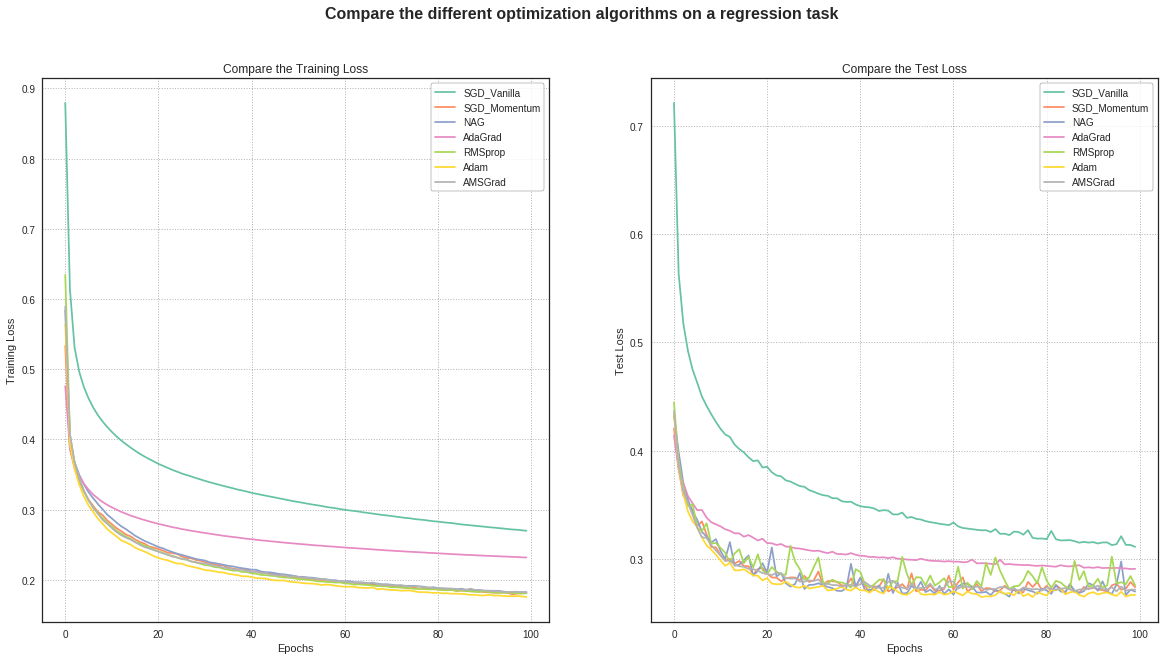

In [36]:
plt.style.use('seaborn-white')
fig,(ax3,ax4) = plt.subplots(1,2,figsize=(20,10))


ax3.plot(model_1_history.history['loss'],color=colors[0],label='SGD_Vanilla')
ax3.plot(model_2_history.history['loss'],color=colors[1],label='SGD_Momentum')
ax3.plot(model_3_history.history['loss'],color=colors[2],label='NAG')
ax3.plot(model_4_history.history['loss'],color=colors[3],label='AdaGrad')
ax3.plot(model_5_history.history['loss'],color=colors[4],label='RMSprop')
ax3.plot(model_6_history.history['loss'],color=colors[5],label='Adam')
ax3.plot(model_7_history.history['loss'],color=colors[7],label='AMSGrad')
ax3.legend(frameon=True,edgecolor='black')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss')
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss')

ax4.plot(model_1_history.history['val_loss'],color=colors[0],label='SGD_Vanilla')
ax4.plot(model_2_history.history['val_loss'],color=colors[1],label='SGD_Momentum')
ax4.plot(model_3_history.history['val_loss'],color=colors[2],label='NAG')
ax4.plot(model_4_history.history['val_loss'],color=colors[3],label='AdaGrad')
ax4.plot(model_5_history.history['val_loss'],color=colors[4],label='RMSprop')
ax4.plot(model_6_history.history['val_loss'],color=colors[5],label='Adam')
ax4.plot(model_7_history.history['val_loss'],color=colors[7],label='AMSGrad')
ax4.legend(frameon=True,edgecolor='black')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Test Loss')
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Test Loss')

fig.suptitle('Compare the different optimization algorithms on a regression task',fontsize=16, fontweight='bold')
plt.show()